In [2]:
from __future__ import absolute_import 
from __future__ import division
from __future__ import print_function

from model.facedeconv import DeconvNet
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
path_model  = './facetNet_deconv.hdf5'

In [4]:
BATCH_SIZE = 32
deconv = DeconvNet()
model  = deconv.build_model(print_summary = True, batch_size = BATCH_SIZE)

building network
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv1-1 (Conv2D)             (None, 96, 96, 8)         72        
_________________________________________________________________
batchnorm1-1 (BatchNormaliza (None, 96, 96, 8)         32        
_________________________________________________________________
relu1-1 (Activation)         (None, 96, 96, 8)         0         
_________________________________________________________________
conv1-2 (Conv2D)             (None, 96, 96, 8)         576       
_________________________________________________________________
batchnorm1-2 (BatchNormaliza (None, 96, 96, 8)         32        
____________________________

In [5]:
deconv.load(path_model)

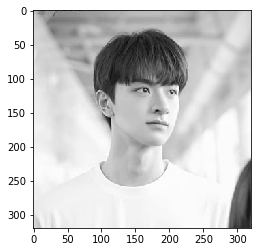

(320, 320)

In [49]:
imgpath = '/mnt/c/Users/Z440_user1/Downloads/facedata/1.jpg'
#imgpath = '/Users/inchanji/GoogleDrive/tof/pyQTclientDistAmp/data/g_59.png'
#imgpath = '/Users/inchanji/Research/faceData/faceclip/test/5CD1C599-29AB-495B-A258-F96765A17AE6_w1023_r1_s.jpg'
#imgpath = '/Users/inchanji/Downloads/FACE_ATTRIBUTES/FULL/test/helen/30427236_2.jpg'

img0 = cv2.imread(imgpath)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
plt.imshow(img0, cmap = 'gray')
plt.show()
np.shape(img0)


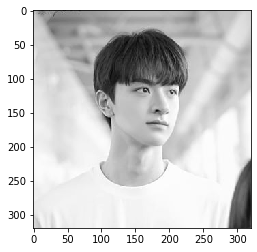

In [50]:

ID = 330

imgpath = '/mnt/c/Users/Z440_user1/Downloads/facedata/1.jpg'
distpath = '/mnt/c/Users/Z440_user1/Downloads/facedata/1.jpg'

#imgpath = '/Users/inchanji/Research/faceData/faceclip/test/5CD1C599-29AB-495B-A258-F96765A17AE6_w1023_r1_s.jpg'
#imgpath = '/Users/inchanji/Downloads/FACE_ATTRIBUTES/FULL/test/helen/30427236_2.jpg'

img0 = cv2.imread(imgpath)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

dist0 = cv2.imread(distpath)
dist0 = cv2.cvtColor(dist0, cv2.COLOR_BGR2GRAY)


#img0[np.logical_and(img0 < 50, dist0 < 50)] = 255
img0[np.logical_and(img0 < 10, dist0 < 10)] = 200

plt.imshow(img0, cmap = 'gray')
plt.show()

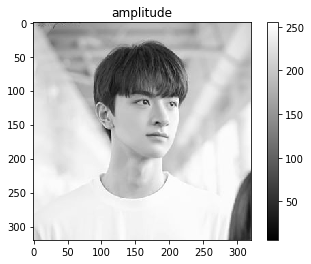

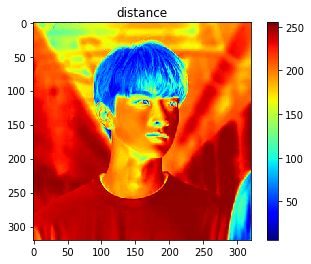

In [51]:

ID = 320

imgpath = '/mnt/c/Users/Z440_user1/Downloads/facedata/1.jpg'
distpath = '/mnt/c/Users/Z440_user1/Downloads/facedata/1.jpg'

#imgpath = '/Users/inchanji/Research/faceData/faceclip/test/5CD1C599-29AB-495B-A258-F96765A17AE6_w1023_r1_s.jpg'
#imgpath = '/Users/inchanji/Downloads/FACE_ATTRIBUTES/FULL/test/helen/30427236_2.jpg'

img0 = cv2.imread(imgpath)
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

dist0 = cv2.imread(distpath)
dist0 = cv2.cvtColor(dist0, cv2.COLOR_BGR2GRAY)


#img0[np.logical_and(img0 < 50, dist0 < 50)] = 255
#img0[np.logical_and(img0 < 10, dist0 < 10)] = 200

plt.imshow(img0, cmap = 'gray')
plt.colorbar()
plt.title('amplitude')
plt.show()

plt.imshow(dist0, cmap = 'jet')
plt.colorbar()
plt.title('distance')
plt.show()

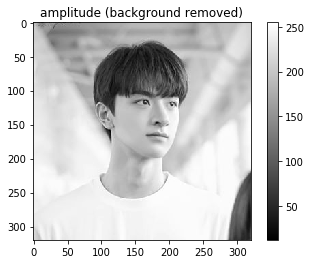

In [52]:
img0[np.logical_and(img0 < 10, dist0 < 10)] = 200
plt.imshow(img0, cmap = 'gray')
plt.colorbar()
plt.title('amplitude (background removed)')
plt.show()


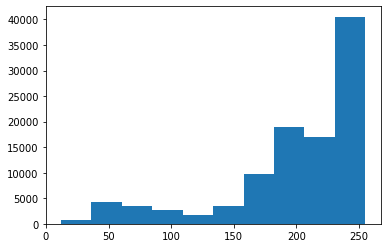

In [53]:
plt.hist(img0.ravel())
plt.show()

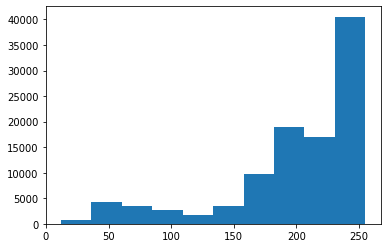

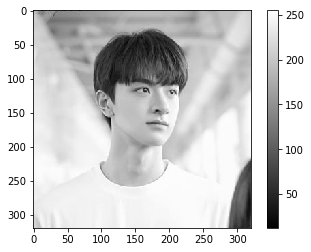

In [62]:
img = img0.copy()
pix_face = np.logical_and(img < 200, img > 30) 
#brightest = np.max(img[img < 200].ravel())


avg = np.mean(img[pix_face].ravel())
std = np.std(img[pix_face].ravel())


#img[pix_face] = img[pix_face] / brightest * 200
plt.hist(img.ravel())
plt.show()

plt.imshow(img, cmap = 'gray')
plt.colorbar()
plt.show()

320


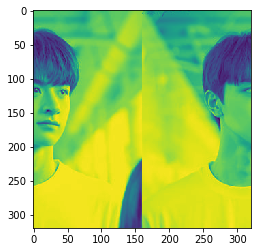

In [63]:
h, w = np.shape(img0)
print(w)

imgroll = np.roll(img0, int(0.5*w), axis = 1)

plt.imshow(imgroll)
plt.show()

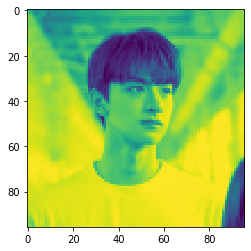

In [64]:
imgInfer = np.zeros((1, 96, 96, 1))
img = np.array(img0, dtype = 'float32')
img1 = cv2.resize(img, (96,96), interpolation = cv2.INTER_AREA)
plt.imshow(img1)
plt.show()
img1 /= 255
img = np.expand_dims(img1, axis=2)
img = np.expand_dims(img, axis=0)
imgInfer[:] = img 

pred  = deconv.predict(imgInfer)[0]

In [65]:
out = np.zeros((96, 96), dtype = np.int)

for i in range(96):
    for j in range(96):
        out[i,j] = int(np.argmax(pred[i,j,:]))



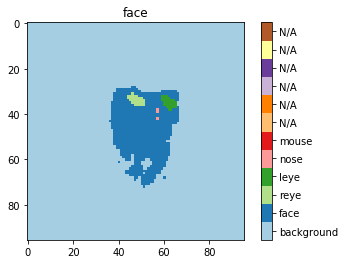

In [66]:
label = ['background', 'face','reye','leye','nose','mouse','N/A','N/A','N/A','N/A','N/A','N/A']
title = label[ int(np.median(out[np.where(np.array(out) > 0)]))]

fig, ax = plt.subplots()
plt.title(title)
cax = ax.imshow(out, cmap = 'Paired', vmin = -0.5, vmax = 11.5)
cbar = fig.colorbar(cax, ticks=np.arange(12), orientation='vertical')
cbar.ax.set_yticklabels(label) 
plt.show()

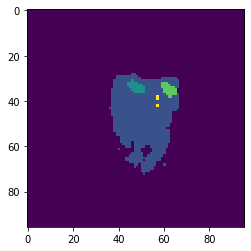

In [67]:
plt.imshow(out)
plt.show()

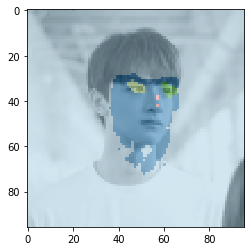

In [68]:
plt.imshow(img1, cmap ='gray')
plt.imshow(out, cmap = 'Paired', vmin = -0.5, vmax = 11.5, alpha= 0.5)
plt.show()

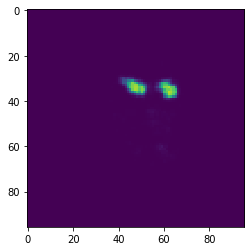

In [69]:
plt.imshow(pred[:,:,2]+pred[:,:,3], vmin = 0, vmax = 1)
plt.show()

